In [1]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
TRAINING_RESULT = 'training-result'

In [3]:
result_dirs = [i for i in os.listdir(TRAINING_RESULT) if os.path.isdir(os.path.join(TRAINING_RESULT, i))]
result_dirs

['ZOOANIMALS-3-64-32-100-32-32-0.0002-0.5-100-500-CUDA',
 'ZOOANIMALS-3-64-32-100-128-128-0.0002-0.5-100-500-CUDA',
 'ZOOANIMALS-3-64-32-100-64-64-0.0002-0.5-100-1500-CUDA',
 'ZOOANIMALS-3-64-32-100-64-128-0.0002-0.5-100-1500-CUDA',
 'ZOOANIMALS-3-64-32-100-32-32-0.0002-0.5-100-1500-CUDA',
 'ZOOANIMALS-3-64-32-100-128-64-0.0002-0.5-100-1500-CUDA',
 'ZOOANIMALS-3-64-32-100-64-128-0.0002-0.5-100-500-CUDA',
 'ZOOANIMALS-3-64-32-100-128-128-0.0002-0.5-100-1500-CUDA',
 'ZOOANIMALS-3-64-32-100-128-64-0.0002-0.5-100-500-CUDA',
 'ZOOANIMALS-3-64-32-100-64-64-0.0002-0.5-100-500-CUDA']

In [4]:
model_data = []
for model_id in result_dirs:
    DATASET, NC, IMG_SIZE, BATCH_SIZE, NZ, NGF, NDF, LR, BETA1, EPOCHS, DOWN_SAMPLING_SIZE, DEVICE = model_id.split('-')
    save_path = os.path.join(TRAINING_RESULT, model_id)
    model_data.append([DATASET, NC, IMG_SIZE, BATCH_SIZE, NZ, NGF, NDF, LR, BETA1, EPOCHS, DOWN_SAMPLING_SIZE, DEVICE, save_path])

df_model = pd.DataFrame(model_data, columns=['DATASET', 'NC', 'IMG_SIZE', 'BATCH_SIZE', 'NZ', 'NGF', 'NDF', 'LR', 'BETA1', 'EPOCHS', 'S_SIZE', 'DEVICE', 'save path'])
df_model['NC'] = pd.to_numeric(df_model['NC'])
df_model['IMG_SIZE'] = pd.to_numeric(df_model['IMG_SIZE'])
df_model['BATCH_SIZE'] = pd.to_numeric(df_model['BATCH_SIZE'])
df_model['NZ'] = pd.to_numeric(df_model['NZ'])
df_model['NGF'] = pd.to_numeric(df_model['NGF'])
df_model['NDF'] = pd.to_numeric(df_model['NDF'])
df_model['LR'] = pd.to_numeric(df_model['LR'])
df_model['BETA1'] = pd.to_numeric(df_model['BETA1'])
df_model['EPOCHS'] = pd.to_numeric(df_model['EPOCHS'])
df_model['S_SIZE'] = pd.to_numeric(df_model['S_SIZE'])
df_model = df_model.sort_values(by=['S_SIZE', 'NGF', 'NDF'])
df_model

DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR  BETA1  EPOCHS   
0  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100  \
9  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
6  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100   
8  ZOOANIMALS   3        64          32  100  128   64  0.0002    0.5     100   
1  ZOOANIMALS   3        64          32  100  128  128  0.0002    0.5     100   
4  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100   
2  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
3  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100   
5  ZOOANIMALS   3        64          32  100  128   64  0.0002    0.5     100   
7  ZOOANIMALS   3        64          32  100  128  128  0.0002    0.5     100   

   S_SIZE DEVICE                                          save path  
0     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...  
9     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...  
6     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...  
8     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-64-...  
1     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-128...  
4    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...  
2    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...  
3    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...  
5    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-64-...  
7    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-128...

In [5]:
def get_training_time(row):
    _dir = row['save path']
    training_metrices = os.path.join(_dir, 'training-log.csv')
    df_train_log = pd.read_csv(training_metrices, index_col=0)
    training_time = df_train_log['elapsed_time'].sum()
    return training_time


def get_training_time_str(row):
    _dir = row['save path']
    training_metrices = os.path.join(_dir, 'training-log.csv')
    df_train_log = pd.read_csv(training_metrices, index_col=0)
    training_time = df_train_log['elapsed_time'].sum()
    str_time = str(datetime.timedelta(seconds=training_time))
    return str_time

In [6]:
df_model['training time (s)'] = df_model.apply(lambda x: get_training_time(x), axis=1)
df_model['H:MM:SS'] = df_model.apply(lambda x: get_training_time_str(x), axis=1)
df_model

DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR  BETA1  EPOCHS   
0  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100  \
9  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
6  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100   
8  ZOOANIMALS   3        64          32  100  128   64  0.0002    0.5     100   
1  ZOOANIMALS   3        64          32  100  128  128  0.0002    0.5     100   
4  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100   
2  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
3  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100   
5  ZOOANIMALS   3        64          32  100  128   64  0.0002    0.5     100   
7  ZOOANIMALS   3        64          32  100  128  128  0.0002    0.5     100   

   S_SIZE DEVICE                                          save path   
0     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...  \
9     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...   
6     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...   
8     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-64-...   
1     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-128...   
4    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...   
2    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...   
3    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...   
5    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-64-...   
7    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-128...   

   training time (s)         H:MM:SS  
0         586.032212  0:09:46.032212  
9        1021.844561  0:17:01.844561  
6        2790.996404  0:46:30.996404  
8        1729.198487  0:28:49.198487  
1        3557.511505  0:59:17.511505  
4        1838.337111  0:30:38.337111  
2        2909.312079  0:48:29.312079  
3        9269.438068  2:34:29.438068  
5        4830.129345  1:20:30.129345  
7       11109.745460  3:05:09.745460

In [7]:
df_model[df_model['NDF'] > df_model['NGF']]

DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR  BETA1  EPOCHS   
6  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100  \
3  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100   

   S_SIZE DEVICE                                          save path   
6     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...  \
3    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...   

   training time (s)         H:MM:SS  
6        2790.996404  0:46:30.996404  
3        9269.438068  2:34:29.438068

In [8]:
def get_tt_by_index(id):
    return df_model[df_model.index == id]['training time (s)'].values[0]

In [9]:
print(f'using 1500 images per category training time is {get_tt_by_index(3)/get_tt_by_index(6):.3f} times longer than 500 images per category')

using 1500 images per category training time is 3.321 times longer than 500 images per category


In [10]:
df_model[df_model['NDF'] < df_model['NGF']]

DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR  BETA1  EPOCHS   
8  ZOOANIMALS   3        64          32  100  128   64  0.0002    0.5     100  \
5  ZOOANIMALS   3        64          32  100  128   64  0.0002    0.5     100   

   S_SIZE DEVICE                                          save path   
8     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-64-...  \
5    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-64-...   

   training time (s)         H:MM:SS  
8        1729.198487  0:28:49.198487  
5        4830.129345  1:20:30.129345

In [11]:
print(f'using 1500 images per category training time is {get_tt_by_index(5)/get_tt_by_index(8)} times longer than 500 images per category')

using 1500 images per category training time is 2.793276411139159 times longer than 500 images per category


In [12]:
print(f'on other comparison, we can see that using larger NDF require longer training time,\n \
    which is {get_tt_by_index(6)/get_tt_by_index(8):.3f} times longer with S_SIZE 500 \n \
    and {get_tt_by_index(3)/get_tt_by_index(5):.3f} times longer with S_SIZE 1500' )

on other comparison, we can see that using larger NDF require longer training time,
     which is 1.614 times longer with S_SIZE 500 
     and 1.919 times longer with S_SIZE 1500


In [13]:
df_model_same_GD_size = df_model[df_model['NDF'] == df_model['NGF']].sort_values(by='NGF')
df_model_same_GD_size

DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR  BETA1  EPOCHS   
0  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100  \
4  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100   
9  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
2  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
1  ZOOANIMALS   3        64          32  100  128  128  0.0002    0.5     100   
7  ZOOANIMALS   3        64          32  100  128  128  0.0002    0.5     100   

   S_SIZE DEVICE                                          save path   
0     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...  \
4    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...   
9     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...   
2    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...   
1     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-128...   
7    1500   CUDA  training-result/ZOOANIMALS-3-64-32-100-128-128...   

   training time (s)         H:MM:SS  
0         586.032212  0:09:46.032212  
4        1838.337111  0:30:38.337111  
9        1021.844561  0:17:01.844561  
2        2909.312079  0:48:29.312079  
1        3557.511505  0:59:17.511505  
7       11109.745460  3:05:09.745460

In [14]:
df_ssize500_tt = df_model_same_GD_size[df_model_same_GD_size['S_SIZE'] == 500][['NGF', 'training time (s)']]
df_ssize1500_tt = df_model_same_GD_size[df_model_same_GD_size['S_SIZE'] == 1500][['NGF', 'training time (s)']]
df_ssize500_tt

NGF  training time (s)
0   32         586.032212
9   64        1021.844561
1  128        3557.511505

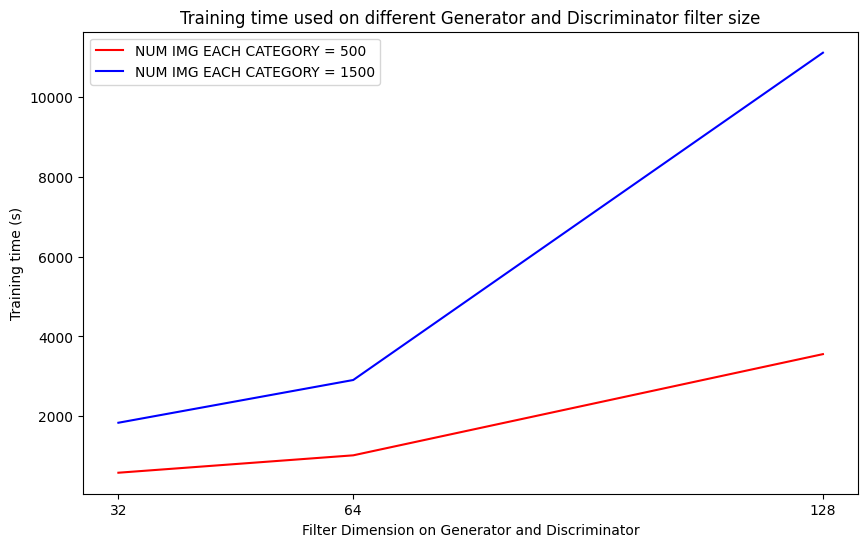

In [15]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(df_ssize500_tt['NGF'].values, df_ssize500_tt['training time (s)'].values, color='red', label='NUM IMG EACH CATEGORY = 500')
ax.plot(df_ssize1500_tt['NGF'].values, df_ssize1500_tt['training time (s)'].values, color='blue', label='NUM IMG EACH CATEGORY = 1500')
plt.xticks(df_ssize500_tt['NGF'].values)
plt.title('Training time used on different Generator and Discriminator filter size')
plt.ylabel('Training time (s)')
plt.xlabel('Filter Dimension on Generator and Discriminator')
plt.legend()
plt.show()
plt.close()

In [16]:
def get_100th_epoch_img(row):
    train_res_path = row['save path']
    all_files = os.listdir(train_res_path)
    img_100th_epoch = [i for i in all_files if 'epoch-0100' in i]
    if len(img_100th_epoch) > 0:
        return img_100th_epoch[0]
    else:
        return None

In [17]:
df_model['image result'] = df_model.apply(lambda x: get_100th_epoch_img(x), axis=1)
df_model.head(3)

DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR  BETA1  EPOCHS   
0  ZOOANIMALS   3        64          32  100   32   32  0.0002    0.5     100  \
9  ZOOANIMALS   3        64          32  100   64   64  0.0002    0.5     100   
6  ZOOANIMALS   3        64          32  100   64  128  0.0002    0.5     100   

   S_SIZE DEVICE                                          save path   
0     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-32-32-0...  \
9     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-64-0...   
6     500   CUDA  training-result/ZOOANIMALS-3-64-32-100-64-128-...   

   training time (s)         H:MM:SS              image result  
0         586.032212  0:09:46.032212  epoch-0100_batch-125.png  
9        1021.844561  0:17:01.844561  epoch-0100_batch-125.png  
6        2790.996404  0:46:30.996404  epoch-0100_batch-125.png

In [18]:
df_model_img_res = df_model[df_model['image result'].isna() != True]
df_model_img_res = df_model_img_res.reset_index()
df_model_img_res = df_model_img_res.rename(columns={'index': 'prev index'})
df_model_img_res

prev index     DATASET  NC  IMG_SIZE  BATCH_SIZE   NZ  NGF  NDF      LR   
0           0  ZOOANIMALS   3        64          32  100   32   32  0.0002  \
1           9  ZOOANIMALS   3        64          32  100   64   64  0.0002   
2           6  ZOOANIMALS   3        64          32  100   64  128  0.0002   
3           8  ZOOANIMALS   3        64          32  100  128   64  0.0002   
4           1  ZOOANIMALS   3        64          32  100  128  128  0.0002   
5           4  ZOOANIMALS   3        64          32  100   32   32  0.0002   
6           2  ZOOANIMALS   3        64          32  100   64   64  0.0002   
7           3  ZOOANIMALS   3        64          32  100   64  128  0.0002   
8           5  ZOOANIMALS   3        64          32  100  128   64  0.0002   
9           7  ZOOANIMALS   3        64          32  100  128  128  0.0002   

   BETA1  EPOCHS  S_SIZE DEVICE   
0    0.5     100     500   CUDA  \
1    0.5     100     500   CUDA   
2    0.5     100     500   CUDA   
3    0.5     100     500   CUDA   
4    0.5     100     500   CUDA   
5    0.5     100    1500   CUDA   
6    0.5     100    1500   CUDA   
7    0.5     100    1500   CUDA   
8    0.5     100    1500   CUDA   
9    0.5     100    1500   CUDA   

                                           save path  training time (s)   
0  training-result/ZOOANIMALS-3-64-32-100-32-32-0...         586.032212  \
1  training-result/ZOOANIMALS-3-64-32-100-64-64-0...        1021.844561   
2  training-result/ZOOANIMALS-3-64-32-100-64-128-...        2790.996404   
3  training-result/ZOOANIMALS-3-64-32-100-128-64-...        1729.198487   
4  training-result/ZOOANIMALS-3-64-32-100-128-128...        3557.511505   
5  training-result/ZOOANIMALS-3-64-32-100-32-32-0...        1838.337111   
6  training-result/ZOOANIMALS-3-64-32-100-64-64-0...        2909.312079   
7  training-result/ZOOANIMALS-3-64-32-100-64-128-...        9269.438068   
8  training-result/ZOOANIMALS-3-64-32-100-128-64-...        4830.129345   
9  training-result/ZOOANIMALS-3-64-32-100-128-128...       11109.745460   

          H:MM:SS              image result  
0  0:09:46.032212  epoch-0100_batch-125.png  
1  0:17:01.844561  epoch-0100_batch-125.png  
2  0:46:30.996404  epoch-0100_batch-125.png  
3  0:28:49.198487  epoch-0100_batch-125.png  
4  0:59:17.511505  epoch-0100_batch-125.png  
5  0:30:38.337111  epoch-0100_batch-375.png  
6  0:48:29.312079  epoch-0100_batch-375.png  
7  2:34:29.438068  epoch-0100_batch-375.png  
8  1:20:30.129345  epoch-0100_batch-375.png  
9  3:05:09.745460  epoch-0100_batch-375.png

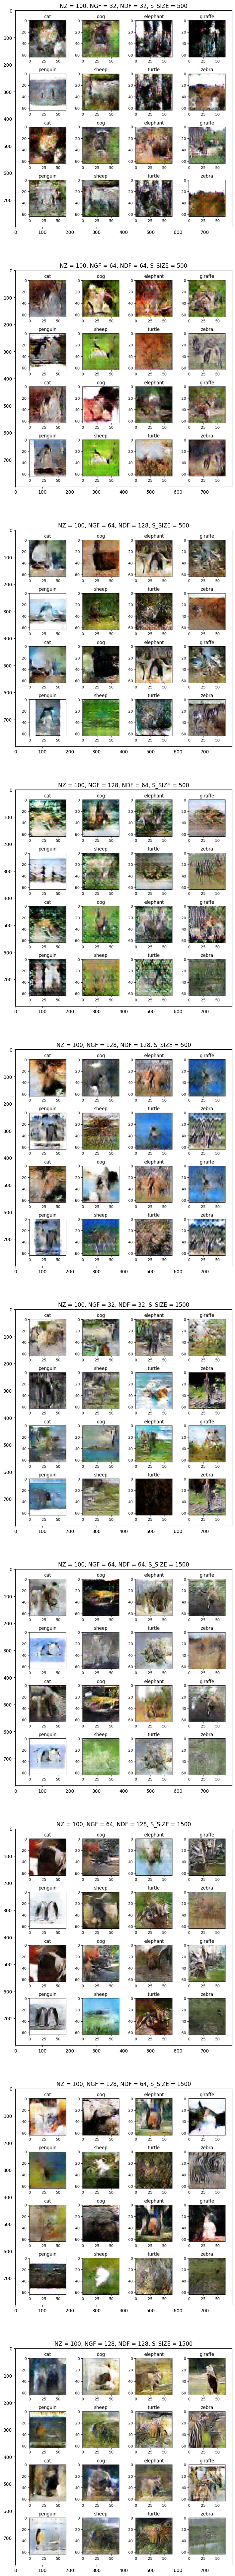

In [19]:
n_row = df_model_img_res.shape[0]
f2, axs = plt.subplots(n_row, 1, figsize=(10, 10*n_row))
for i in range(len(axs)):
    ax = axs[i]
    data = df_model_img_res[df_model_img_res.index == i]
    nz, ngf, ndf, s_size = data[['NZ', 'NGF', 'NDF', 'S_SIZE']].values[0]
    pth, filename = data[['save path', 'image result']].values[0]

    ax.title.set_text(f'NZ = {nz}, NGF = {ngf}, NDF = {ndf}, S_SIZE = {s_size}')
    img = Image.open(os.path.join(pth, filename))
    ax.imshow(img)

# f2.tight_layout()
plt.show()
plt.close()

In [20]:
# only saving image to disk, without sowing it
n_row = df_model_img_res.shape[0]
for i in range(n_row):
    f3, ax = plt.subplots(1, 1, figsize=(10, 10))
    data = df_model_img_res[df_model_img_res.index == i]
    nz, ngf, ndf, s_size = data[['NZ', 'NGF', 'NDF', 'S_SIZE']].values[0]
    pth, filename = data[['save path', 'image result']].values[0]

    ax.title.set_text(f'NZ = {nz}, NGF = {ngf}, NDF = {ndf}, S_SIZE = {s_size}')
    img = Image.open(os.path.join(pth, filename))
    ax.imshow(img)
    f3.savefig(f'{nz}-{ngf}-{ndf}-{s_size}.jpg')
    plt.close()